# **Project Name -Classification Health Insurance Cross Sell Prdictions**

**Project Type** - Classification



**Contribution** - Individual

# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Problem Statement**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [556]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


In [488]:
data=pd.read_csv('TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [489]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [490]:
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [491]:
data.shape

(381109, 12)

In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [493]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [494]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [495]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [496]:
encoder=OneHotEncoder()
Gender=encoder.fit_transform(data[['Gender']])
Gender.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [497]:
Gender_Encoding=pd.DataFrame(Gender.toarray(),columns=['Female','Male'])
data=pd.concat([data,Gender_Encoding],axis=1)
data.sample(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male
373254,373255,Female,28,1,19.0,1,< 1 Year,No,2630.0,152.0,195,0,1.0,0.0
99259,99260,Male,53,1,48.0,1,1-2 Year,No,2630.0,124.0,171,0,0.0,1.0
93909,93910,Female,36,1,50.0,0,1-2 Year,Yes,32886.0,124.0,88,1,1.0,0.0


In [498]:
Vehicle=encoder.fit_transform(data[['Vehicle_Damage']])
Vehicle.toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [499]:
Vehicle_Encoding=pd.DataFrame(Vehicle.toarray(),columns=['No_Damage','Yes_Damage'])
data=pd.concat([data,Vehicle_Encoding],axis=1)
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,No_Damage,Yes_Damage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.0,1.0,0.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0.0,1.0,1.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.0,1.0,0.0,1.0


In [500]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Female                  float64
Male                    float64
No_Damage               float64
Yes_Damage              float64
dtype: object

In [501]:
import re
text="1-2 Year"

In [502]:
dump=re.findall('\d',text)
dump

['1', '2']

In [503]:
def year(text):
  nums=re.findall('\d+',text)
  if len(nums)>0:
    return int(nums[-1])
  else:
    return 0


In [504]:
data['Vehicle_Age']=data['Vehicle_Age'].apply(year)

In [505]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,No_Damage,Yes_Damage
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1,0.0,1.0,0.0,1.0
1,2,Male,76,1,3.0,0,2,No,33536.0,26.0,183,0,0.0,1.0,1.0,0.0
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1,0.0,1.0,0.0,1.0
3,4,Male,21,1,11.0,1,1,No,28619.0,152.0,203,0,0.0,1.0,1.0,0.0
4,5,Female,29,1,41.0,1,1,No,27496.0,152.0,39,0,1.0,0.0,1.0,0.0


In [506]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Female                  float64
Male                    float64
No_Damage               float64
Yes_Damage              float64
dtype: object

In [507]:
data.drop(columns=['Gender','Vehicle_Damage'],inplace=True)

In [508]:
data.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Female', 'Male', 'No_Damage', 'Yes_Damage'],
      dtype='object')

In [509]:
data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

<BarContainer object of 2 artists>

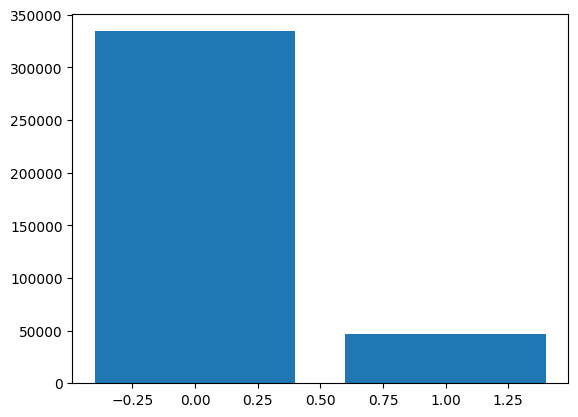

In [510]:
plt.bar(x=data['Response'].value_counts().index,height=data['Response'].value_counts())

from this we can state that there is highly skewed data are there where not intrested are more than intrested

<ipython-input-511-182186e2a7bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Response'],kde=True)


<Axes: xlabel='Response', ylabel='Density'>

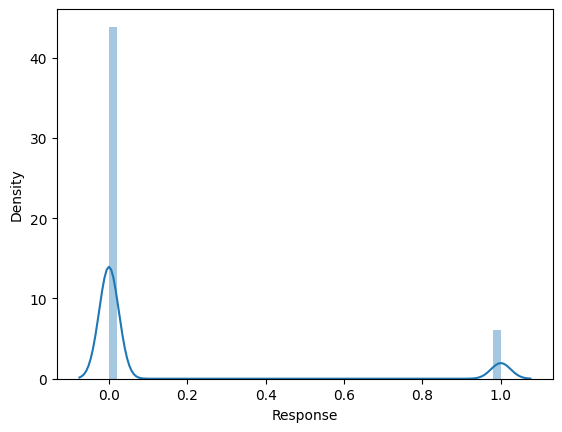

In [511]:
sns.distplot(data['Response'],kde=True)

for handling this we can various methods line smot , minority/mojority class sampling we can use strafied smapling method

In [512]:
type(data.corr())

pandas.core.frame.DataFrame

In [513]:
data.corr().head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,No_Damage,Yes_Damage
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.001194,0.003027,-0.002837,-0.000630,-0.001368,-0.000999,0.000999,0.001507,-0.001507
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.787775,0.067507,-0.577826,-0.001264,0.111147,-0.145545,0.145545,-0.267534,0.267534
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.040215,-0.011906,0.043731,-0.000848,0.010155,0.018374,-0.018374,0.016622,-0.016622
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,0.044250,-0.010588,-0.042420,-0.002750,0.010570,-0.000604,0.000604,-0.028235,0.028235
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,-0.358773,0.004269,0.219381,0.002537,-0.341170,0.081932,-0.081932,0.824143,-0.824143


<Axes: >

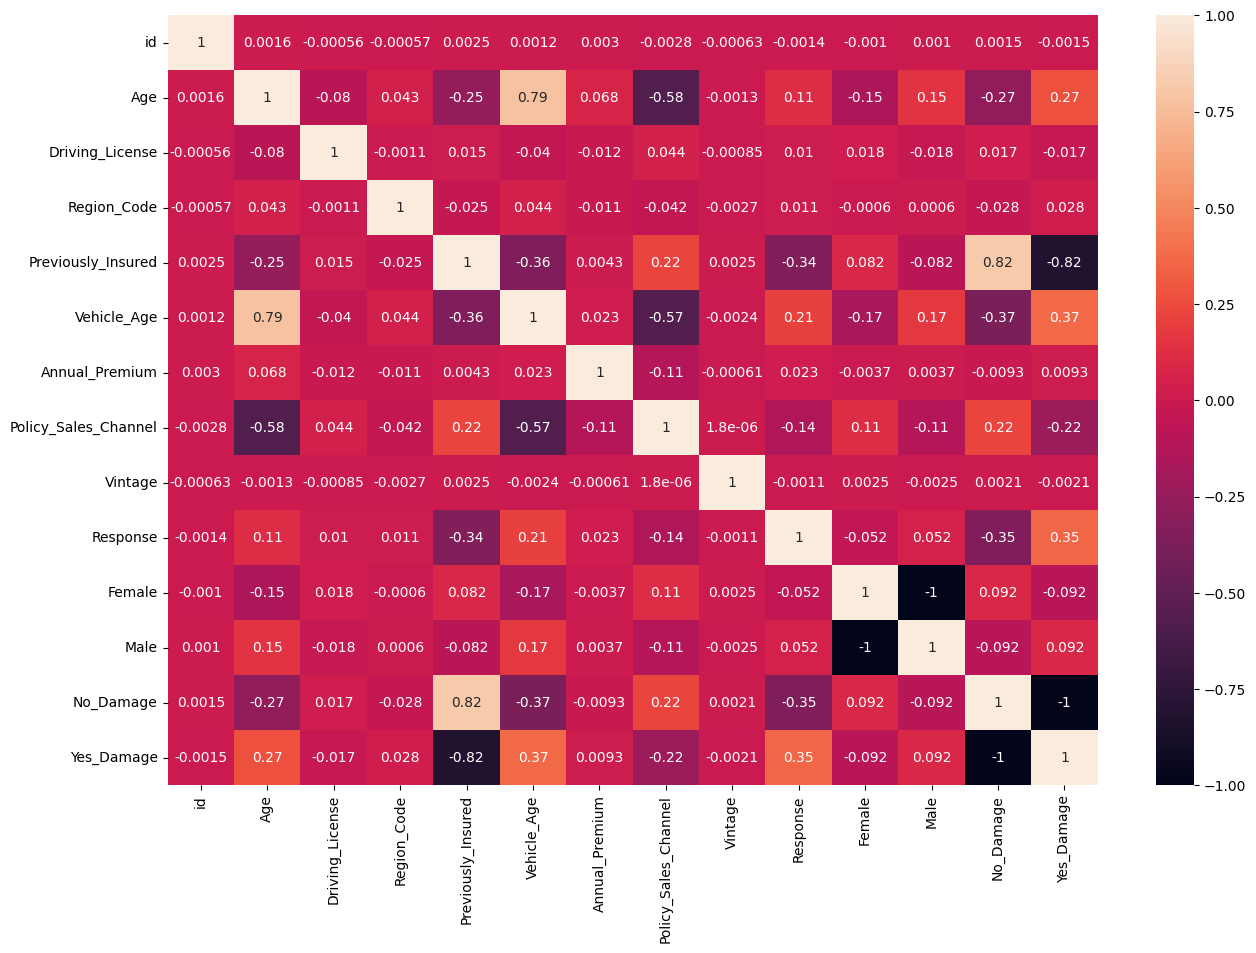

In [514]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

from this we can check how variables are releted with each other like how yes-damage are Highly negatively correlated with Previous Insurance taken persons that we can state that if have taken insurance then chance of damge is very less

***from this we can also conclude that the region_code, annule_premium and Vintage  has not have much value in the datset ***

we can also removed the Driving Licence but i am not going removed just to check as machine learning is not methods it is the science where we learn from implementing it

In [515]:
data.corr().abs()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,No_Damage,Yes_Damage
id,1.000000,0.001561,0.000564,0.000572,0.002457,0.001194,0.003027,0.002837,0.000630,0.001368,0.000999,0.000999,0.001507,0.001507
Age,0.001561,1.000000,0.079782,0.042574,0.254682,0.787775,0.067507,0.577826,0.001264,0.111147,0.145545,0.145545,0.267534,0.267534
Driving_License,0.000564,0.079782,1.000000,0.001081,0.014969,0.040215,0.011906,0.043731,0.000848,0.010155,0.018374,0.018374,0.016622,0.016622
Region_Code,0.000572,0.042574,0.001081,1.000000,0.024659,0.044250,0.010588,0.042420,0.002750,0.010570,0.000604,0.000604,0.028235,0.028235
Previously_Insured,0.002457,0.254682,0.014969,0.024659,1.000000,0.358773,0.004269,0.219381,0.002537,0.341170,0.081932,0.081932,0.824143,0.824143
Vehicle_Age,0.001194,0.787775,0.040215,0.044250,0.358773,1.000000,0.022555,0.571516,0.002410,0.209878,0.166280,0.166280,0.370778,0.370778
Annual_Premium,0.003027,0.067507,0.011906,0.010588,0.004269,0.022555,1.000000,0.113247,0.000608,0.022575,0.003673,0.003673,0.009349,0.009349
Policy_Sales_Channel,0.002837,0.577826,0.043731,0.042420,0.219381,0.571516,0.113247,1.000000,0.000002,0.139042,0.111159,0.111159,0.224377,0.224377
Vintage,0.000630,0.001264,0.000848,0.002750,0.002537,0.002410,0.000608,0.000002,1.000000,0.001050,0.002517,0.002517,0.002064,0.002064
Response,0.001368,0.111147,0.010155,0.010570,0.341170,0.209878,0.022575,0.139042,0.001050,1.000000,0.052440,0.052440,0.354400,0.354400


In [516]:
data.corr().abs().shape

(14, 14)

In [517]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,No_Damage,Yes_Damage
id,NaN,0.001561,0.000564,0.000572,0.002457,0.001194,0.003027,0.002837,0.000630,0.001368,0.000999,0.000999,0.001507,0.001507
Age,NaN,NaN,0.079782,0.042574,0.254682,0.787775,0.067507,0.577826,0.001264,0.111147,0.145545,0.145545,0.267534,0.267534
Driving_License,NaN,NaN,NaN,0.001081,0.014969,0.040215,0.011906,0.043731,0.000848,0.010155,0.018374,0.018374,0.016622,0.016622
Region_Code,NaN,NaN,NaN,NaN,0.024659,0.044250,0.010588,0.042420,0.002750,0.010570,0.000604,0.000604,0.028235,0.028235
Previously_Insured,NaN,NaN,NaN,NaN,NaN,0.358773,0.004269,0.219381,0.002537,0.341170,0.081932,0.081932,0.824143,0.824143
Vehicle_Age,NaN,NaN,NaN,NaN,NaN,NaN,0.022555,0.571516,0.002410,0.209878,0.166280,0.166280,0.370778,0.370778
Annual_Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113247,0.000608,0.022575,0.003673,0.003673,0.009349,0.009349
Policy_Sales_Channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000002,0.139042,0.111159,0.111159,0.224377,0.224377
Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001050,0.002517,0.002517,0.002064,0.002064
Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052440,0.052440,0.354400,0.354400


In [518]:
target_corr = corr_matrix['Response'].drop('Response')
target_corr


id                      0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured      0.341170
Vehicle_Age             0.209878
Annual_Premium          0.022575
Policy_Sales_Channel    0.139042
Vintage                 0.001050
Female                  0.052440
Male                    0.052440
No_Damage               0.354400
Yes_Damage              0.354400
Name: Response, dtype: float64

In [519]:
# Function to remove multicollinear features while keeping highly predictive ones
def remove_multicollinear_features(df, target, threshold=0.9): # here adjust threshold value according to your problem and data
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with high correlation to the target
    target_corr = corr_matrix[target].drop(target)

    # Remove features with high multicollinearity but keep those with high target correlation
    to_drop = [column for column in upper.columns if any(upper[column] > threshold) and target_corr[column] <= threshold]

    # Drop features
    df_reduced = df.drop(columns=to_drop)

    return df_reduced, to_drop, target_corr

In [520]:
data,to_drop,target_corr=remove_multicollinear_features(data,'Response')

In [521]:
to_drop

['Male', 'Yes_Damage']

In [522]:
data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,No_Damage
0,1,44,1,28.0,0,2,40454.0,26.0,217,1,0.0,0.0
1,2,76,1,3.0,0,2,33536.0,26.0,183,0,0.0,1.0
2,3,47,1,28.0,0,2,38294.0,26.0,27,1,0.0,0.0
3,4,21,1,11.0,1,1,28619.0,152.0,203,0,0.0,1.0
4,5,29,1,41.0,1,1,27496.0,152.0,39,0,1.0,1.0


In [523]:
data.Driving_License.value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [524]:
data.drop(columns=['Vintage','Region_Code','Annual_Premium'],inplace=True,axis=1)
data.sample(5)

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Female,No_Damage
171467,171468,50,1,0,2,26.0,0,0.0,1.0
250772,250773,62,1,1,2,26.0,0,1.0,1.0
47004,47005,32,1,1,1,152.0,0,0.0,1.0
327715,327716,23,1,1,1,152.0,0,1.0,1.0
257228,257229,25,1,0,1,152.0,1,0.0,0.0


In [525]:
data.drop('id',inplace=True,axis=1)

In [526]:
data.sample(3)

,Age,Driving_License,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Female,No_Damage
189634,30,1,0,1,160.0,0,1.0,0.0
81052,41,1,0,2,124.0,0,0.0,0.0
132571,35,1,1,2,152.0,0,0.0,1.0


<Axes: ylabel='Age'>

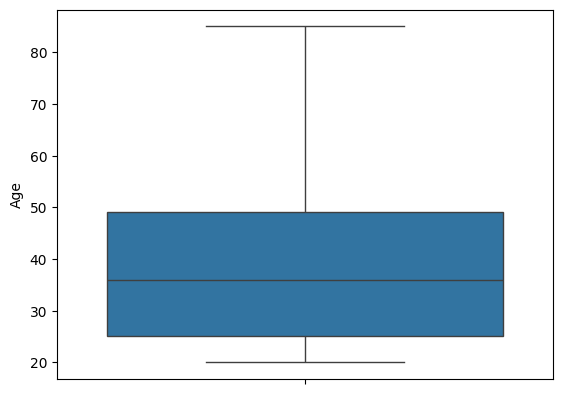

In [527]:
sns.boxplot(data['Age'])

<Axes: ylabel='Vehicle_Age'>

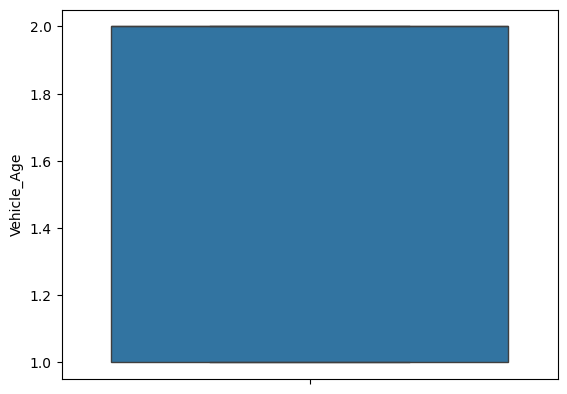

In [528]:
sns.boxplot(data['Vehicle_Age'])

<Axes: ylabel='Policy_Sales_Channel'>

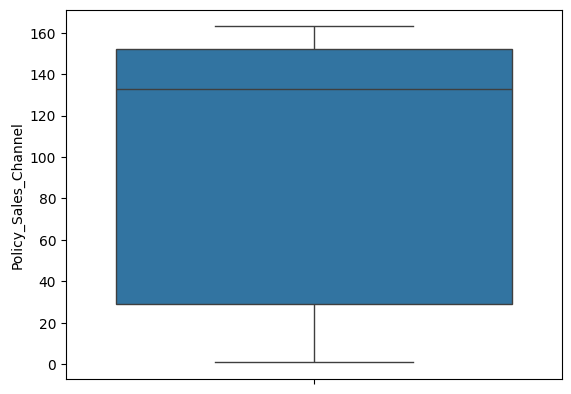

In [529]:
sns.boxplot(data['Policy_Sales_Channel'])

**so there is not having outliers so we don't need to handle it if present we can handle it using the IQR Methos::**

In [530]:
data.head()

,Age,Driving_License,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Female,No_Damage
0,44,1,0,2,26.0,1,0.0,0.0
1,76,1,0,2,26.0,0,0.0,1.0
2,47,1,0,2,26.0,1,0.0,0.0
3,21,1,1,1,152.0,0,0.0,1.0
4,29,1,1,1,152.0,0,1.0,1.0


<Axes: >

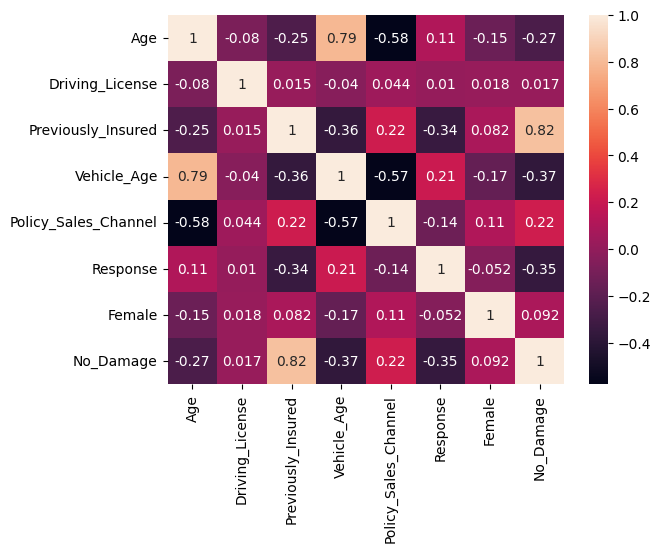

In [531]:
sns.heatmap(data.corr(),annot=True)

In [532]:
data.isnull().sum()

Age                     0
Driving_License         0
Previously_Insured      0
Vehicle_Age             0
Policy_Sales_Channel    0
Response                0
Female                  0
No_Damage               0
dtype: int64

In [533]:
data.dtypes

Age                       int64
Driving_License           int64
Previously_Insured        int64
Vehicle_Age               int64
Policy_Sales_Channel    float64
Response                  int64
Female                  float64
No_Damage               float64
dtype: object

This is basically the final dataset where we have cleaned and done preprocessing of it

In [534]:
X_data=data.drop('Response',axis=1)
Y_data=data['Response']
X_data.head(3)

,Age,Driving_License,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Female,No_Damage
0,44,1,0,2,26.0,0.0,0.0
1,76,1,0,2,26.0,0.0,1.0
2,47,1,0,2,26.0,0.0,0.0


In [535]:
Y_data.head(3)

0    1
1    0
2    1
Name: Response, dtype: int64

In [536]:
data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [537]:
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=42,stratify=Y_data)

In [538]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((304887, 7), (76222, 7), (304887,), (76222,))

In [539]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [540]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [541]:
y_predict=classifier.predict(x_test)

In [542]:
learn_predict=classifier.predict(x_train)
accuracy_score(y_train,learn_predict)

0.8805852660165897

In [543]:
accuracy_score(y_test,y_predict)

0.8746949699561807

In [544]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66880
           1       0.34      0.02      0.04      9342

    accuracy                           0.87     76222
   macro avg       0.61      0.51      0.49     76222
weighted avg       0.81      0.87      0.82     76222



In [545]:
confusion_matrix(y_test,y_predict)

array([[66451,   429],
       [ 9122,   220]])

In [546]:
classifier.predict([[47,1,0,2,26.0,0.0,0.0]])

array([0])

Checking with Random Forest Classifier with undersampling method

In [550]:
pipeline = make_pipeline(SMOTE(random_state=42), RandomUnderSampler(random_state=42))
X_resampled, y_resampled = pipeline.fit_resample(x_train, y_train)

In [557]:
rf_classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [558]:
rf_predict = rf_classifier.predict(x_test)
accuracy_score(y_test, rf_predict)

0.7238461336621973

checking with Random Forest Classifier using oversampling method

In [559]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(x_train, y_train)
rf_classifier_1 = RandomForestClassifier(class_weight='balanced',n_estimators=50,random_state=42)
rf_classifier_1.fit(X_resampled, y_resampled)

NameError: name 'X_test' is not defined

In [560]:
# Predictions on the test set
y_pred = rf_classifier_1.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66880
           1       0.28      0.89      0.43      9342

    accuracy                           0.71     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.89      0.71      0.76     76222



# **We can now go for some feature engineering and some columns we removed to take in consider and check it if it increase accuracy of the model also we can go for another machine learning algorithm like SVM,LogisticRegression or we can go for the Cross validation
 **

In [562]:
import pickle
pickle.dump(classifier,open('classifier.pkl','wb'))

In [563]:
model=pickle.load(open('classifier.pkl','rb'))

# **for getting predictions from model you have to give this parametrs value**

Age,	Driving_License,	Previously_Insured,	Vehicle_Age,	Policy_Sales_Channel,	Female	,No_Damage

In [564]:
def make_predictions(age,DL,PI,VA,PSC,Female,No_Damage):
  x=scaler.transform([[age,DL,PI,VA,PSC,Female,No_Damage]])
  pred=model.predict(x)
  if pred==1:
    print('Yes the Customer is Intrested')
  else:
    print('No Customer not Intrested')


In [565]:
make_predictions(30,1,1,1,124,0,0)

No Customer not Intrested


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
